# MSA 2024 Phase 2 - Part 1

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Find all variables and understand them

In [2]:
# Load the dataset
# display the first ten instances
df_sales = pd.read_csv('store_sales.csv', encoding='ISO-8859-1')
df_sales.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
# key statistical measures
statistics = df_sales.describe()
statistics

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


The key statistical measures of the data are as follows:

Sales: Minimum value 1.89, maximum value 4416.17, mean 349.83, standard deviation 503.18.

Quantity: Minimum value 1, maximum value 14, mean 3.79, standard deviation 2.25.

Discount: Minimum value 0.0, maximum value 0.7, mean 0.17, standard deviation 0.18.

Profit: Minimum value -1862.31, maximum value 1013.13, mean 8.70, standard deviation 136.05.

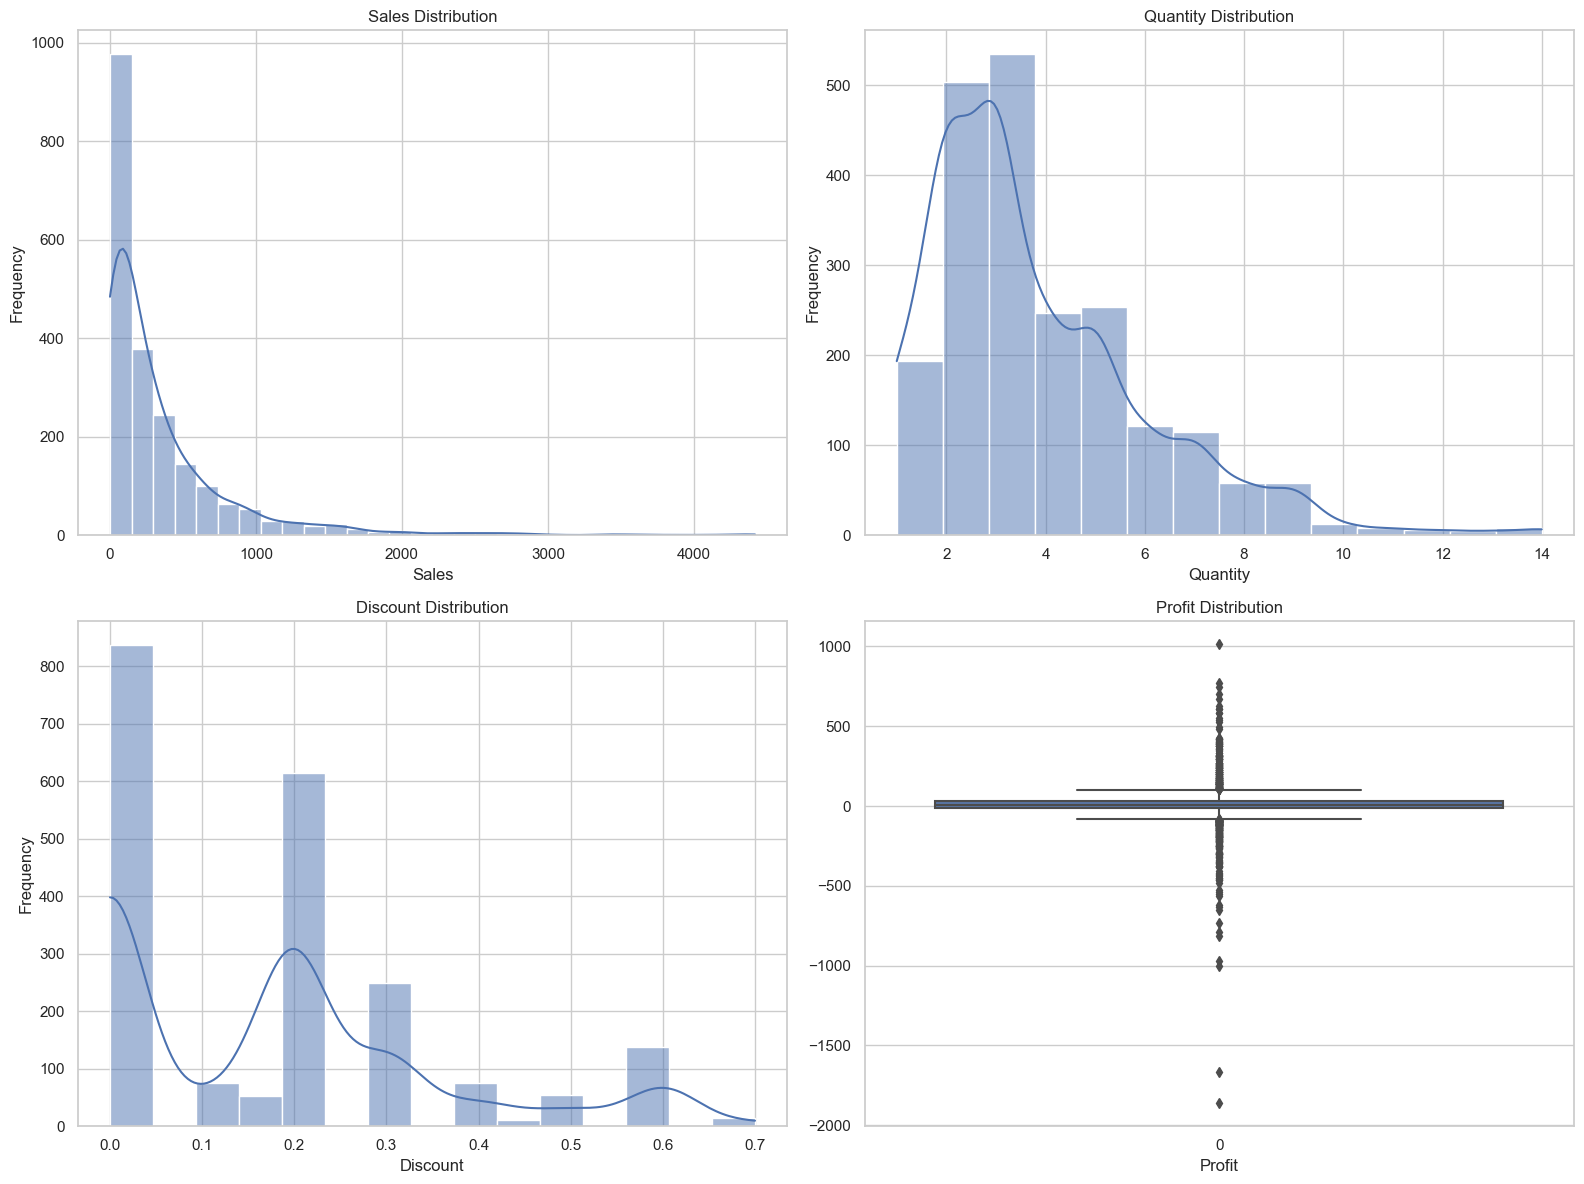

In [5]:
# Set the plot style
sns.set(style="whitegrid")

# Create a 1x4 grid layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the histogram for sales
sns.histplot(df_sales['Sales'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Sales Distribution')
axs[0, 0].set_xlabel('Sales')
axs[0, 0].set_ylabel('Frequency')

# Plot the histogram for quantity
sns.histplot(df_sales['Quantity'], bins=14, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Quantity Distribution')
axs[0, 1].set_xlabel('Quantity')
axs[0, 1].set_ylabel('Frequency')

# Plot the histogram for discounts
sns.histplot(df_sales['Discount'], bins=15, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Discount Distribution')
axs[1, 0].set_xlabel('Discount')
axs[1, 0].set_ylabel('Frequency')

# Plot the boxplot for profit
sns.boxplot(df_sales['Profit'], ax=axs[1, 1])
axs[1, 1].set_title('Profit Distribution')
axs[1, 1].set_xlabel('Profit')

plt.tight_layout()
plt.show()


Sales Distribution:
The sales distribution exhibits a long-tail distribution, with most sales concentrated in the lower range, but there are some very high sales.

Quantity Distribution:
Most orders have a quantity between 1 and 5, with fewer orders having quantities above 5.

Discount Distribution:
The distribution of discounts is relatively uniform, but particularly concentrated at 0.0, 0.2, 0.3, indicating that certain specific discounts are more common.

Profit Distribution:
Profits distribution shows many orders experiencing losses (negative profits), but the majority of orders are profitable.

In [6]:
# Convert the date format
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Ship Date'] = pd.to_datetime(df_sales['Ship Date'])

print(df_sales['Order Date'].dtype)
print(df_sales['Ship Date'].dtype)


datetime64[ns]
datetime64[ns]


In [7]:

# Apply one-hot encoding to specified categorical columns
categorical_columns = ['Ship Mode', 'Segment', 'Sub-Category','Region']
df_sales = pd.get_dummies(df_sales, columns=categorical_columns, dtype=int)

# Print all column names to see the results after one-hot encoding
print(df_sales.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Customer Name', 'Country', 'City', 'State', 'Postal Code',
       'Product ID', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Ship Mode_First Class', 'Ship Mode_Same Day',
       'Ship Mode_Second Class', 'Ship Mode_Standard Class',
       'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office',
       'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Furnishings', 'Sub-Category_Tables', 'Region_Central',
       'Region_East', 'Region_South', 'Region_West'],
      dtype='object')


## 2. Visualise data

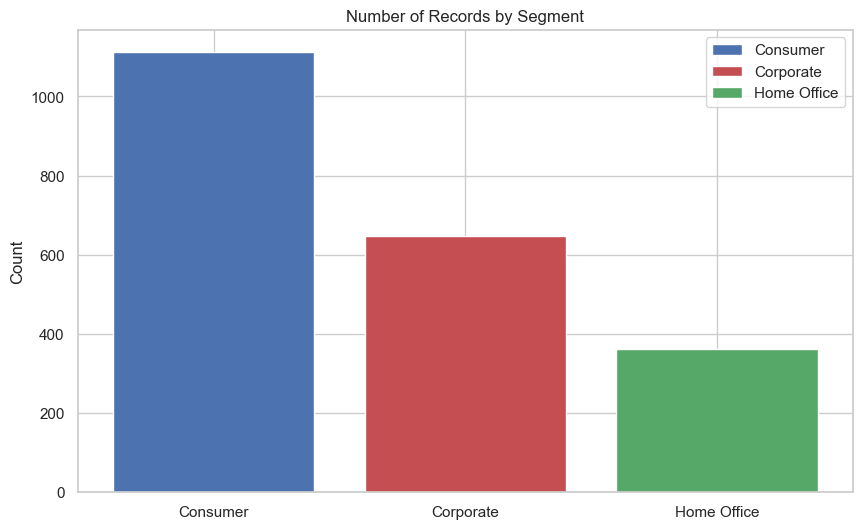

In [8]:

# Calculate the occurrence count for each Segment
segment_counts = df_sales.groupby(['Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']).size().reset_index(name='Count')

# Rename columns to align with the column names after one-hot encoding
segment_counts.columns = ['Consumer', 'Corporate', 'Home Office', 'Count']

# Plot a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each Segment separately
ax.bar('Consumer', segment_counts['Count'][segment_counts['Consumer'] == 1], label='Consumer', color='b')
ax.bar('Corporate', segment_counts['Count'][segment_counts['Corporate'] == 1], label='Corporate', color='r')
ax.bar('Home Office', segment_counts['Count'][segment_counts['Home Office'] == 1], label='Home Office', color='g')

plt.title('Number of Records by Segment')
plt.ylabel('Count')
plt.legend()
plt.show()


## 3. Clean data

In [9]:
# Check missing values
missing_values = df_sales.isna().sum()
print(missing_values)

Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Customer ID                 0
Customer Name               0
Country                     0
City                        0
State                       0
Postal Code                 0
Product ID                  0
Category                    0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Ship Mode_First Class       0
Ship Mode_Same Day          0
Ship Mode_Second Class      0
Ship Mode_Standard Class    0
Segment_Consumer            0
Segment_Corporate           0
Segment_Home Office         0
Sub-Category_Bookcases      0
Sub-Category_Chairs         0
Sub-Category_Furnishings    0
Sub-Category_Tables         0
Region_Central              0
Region_East                 0
Region_South                0
Region_West                 0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df_sales.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 1: Remove outliers using IQR
Q1 = df_sales[numerical_cols].quantile(0.25)
Q3 = df_sales[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define an outlier as any value outside 1.5 * IQR from the Q1 and Q3
data_filtered = df_sales[~((df_sales[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_sales[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

filtered_count = data_filtered.shape[0]
filtered_count



1665

In [11]:
# Step 2: Standardize the numerical data
scaler = StandardScaler()
data_filtered[numerical_cols] = scaler.fit_transform(data_filtered[numerical_cols])

data_filtered[numerical_cols].describe() 

C:\Users\tan\AppData\Local\Temp\ipykernel_2956\2120909767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[numerical_cols] = scaler.fit_transform(data_filtered[numerical_cols])


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03,1.665000e+03
mean,-1.365608e-16,-7.468167e-17,-1.301595e-16,-1.136228e-16,-7.041414e-17,2.987267e-17
std,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00,1.000300e+00
min,-1.766123e+00,-1.702758e+00,-9.198256e-01,-1.281515e+00,-9.381332e-01,-2.822547e+00
25%,-8.483487e-01,-1.020379e+00,-7.618056e-01,-7.210415e-01,-9.381332e-01,-4.722793e-01
50%,2.168994e-02,1.296945e-01,-3.610026e-01,-1.605681e-01,2.385084e-01,-6.703432e-02
75%,8.680350e-01,1.034877e+00,4.361010e-01,3.999053e-01,2.385084e-01,4.289785e-01
max,1.714729e+00,1.316989e+00,4.142438e+00,3.202272e+00,2.591792e+00,2.860792e+00


Handling Missing Values:
The dataset contains no missing values. Each field is complete, eliminating the need for filling or removing missing data.

Handling Outliers:
We detected 456 instances containing outliers. For handling these outliers, we can consider deleting these instances or correcting the outliers, depending on the business context of the data and its impact on the model.

Handling Data Imbalance:

The distribution of the Segment field is as follows:
Consumer: 52.48%
Corporate: 30.46%
Home Office: 17.07%
Clearly, the consumer segment is disproportionately large. This could cause the model to be biased towards the consumer group. Depending on the modeling requirements, it might be considered to use sampling strategies (such as oversampling the minority class or undersampling the majority class) to balance the data.

In [12]:
data_filtered.to_csv('data_filtered.csv')

## 4. Identify correlated variables

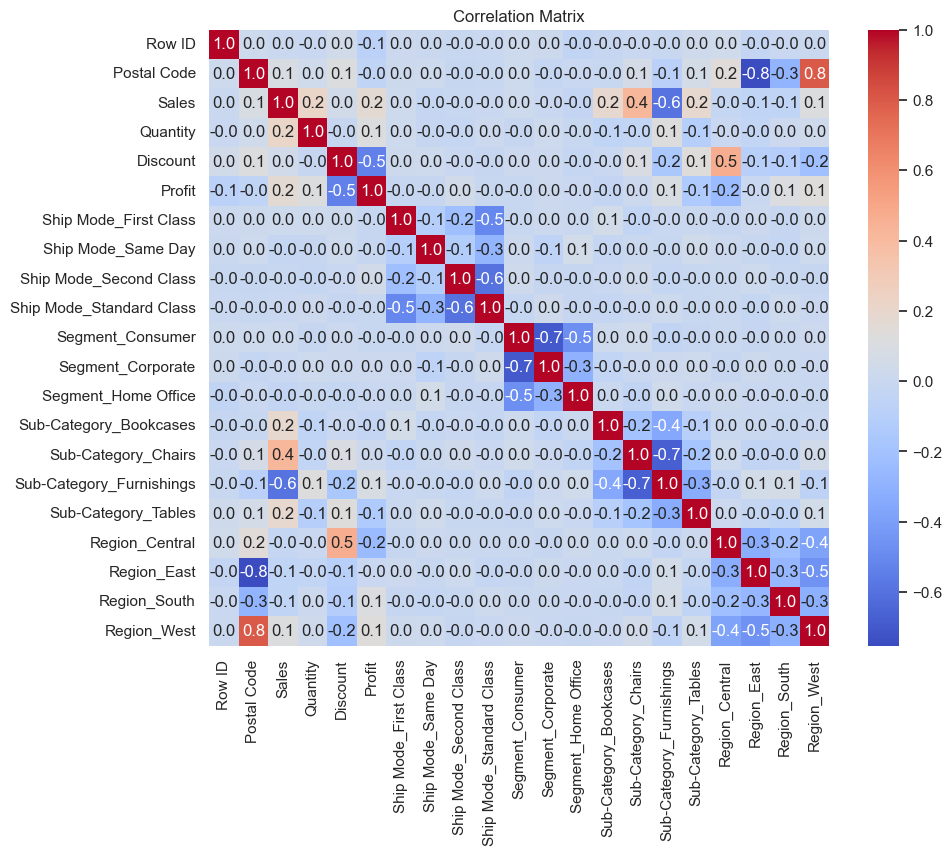

In [14]:
# Select numerical columns
numeric_df = data_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


Sales and Chairs (Sub_Category_Chairs) have a correlation of 0.4, indicating a moderate positive correlation, suggesting that the number of chairs sold may have a positive impact on total sales. 

Sales and Furnishings (Sub_Category_Furnishings) show a strong negative correlation of -0.6, indicating that furnishings sales significantly negatively affect total sales. 

The correlation between Discount and Profit is -0.5, a significant negative correlation, indicating that higher discounts may reduce profit. 

The correlation between Discount and the Central Region (Region_Central) is 0.5, suggesting a strong link between discount strategies and sales in that region. 

First Class and Standard Class shipping modes have a correlation of -0.5, indicating that these two shipping methods may be used interchangeably. 

Consumer (Segment_Consumer) and Corporate (Segment_Corporate) segments show a strong negative correlation of -0.7, indicating that these two market segments are mutually exclusive in terms of customer groups. 

The correlation between Chairs (Sub_Category_Chairs) and Furnishings (Sub_Category_Furnishings) is -0.7, showing a strong negative correlation, which might indicate a mutually exclusive sales effect between these two product categories.

## 5. Summary

In preparing the dataset for training and evaluation, I undertook the following comprehensive exploratory data analysis (EDA) and preprocessing steps:

Data Understanding and Inspection:

Initially, I loaded the data and examined its basic structure and the first few records to understand the included fields and data types.
I conducted a data integrity check to ensure there were no missing values in the dataset.

Statistical Analysis:

I provided key statistical measures such as the mean and standard deviation, which help in understanding the distribution of numerical data.

Data Visualization:

I used graphical tools like histograms and box plots to visualize the distribution of numerical variables, identifying characteristics of the data distribution and potential outliers.
I analyzed key business metrics such as sales, profit, and discounts to uncover trends and patterns in the data.

Outliers and Data Cleaning:

I identified and processed data records containing outliers. Given that outliers could negatively impact model training, I suggested removing these records.
I analyzed the dataset's category balance, particularly customer segmentation, noted the imbalances present, and recommended addressing these issues through sampling techniques.

Feature Correlation Analysis:

I calculated and visualized the correlation matrix between features to determine the relationships among variables. This helps in identifying potentially redundant features or those that significantly impact the prediction targets.
Based on the correlation analysis, I made recommendations to retain or remove specific features to optimize the subsequent model training process.


Findings During EDA and Preprocessing:

Positive Correlation Between Sales and Quantity: This suggests that sales strategies could focus on increasing the quantity of products per transaction to boost total sales.

Negative Correlation Between Discount and Profit: This is a critical finding for business strategy, indicating that high discounts might erode profits, necessitating careful balancing in pricing and promotional strategies.

Impact of Different Shipping Methods on Sales and Profit: Although different shipping methods do not significantly affect the median sales, the highest extreme sales values are seen with the standard shipping method, suggesting opportunities for optimization in logistics.